In [ ]:
import pyforest

# Пример работы EM-алгоритма:

- выбираем число кластеров, которое нам кажется оптимальным, в нашем случае их два;
- выбираем параметр распределений;
- для каждой точки набора считаем вероятность принадлежности каждому распределению;
- пересчитываем параметры распределения;
- повторяем шаги: снова присваиваем точку распределению и считаем параметры.

Рассмотрим реализацию алгоритмы в библиотеке Sklearn. Наш алгоритм лежит в пакете GaussianMixture. При инициализации мы можем указать число компонентов, максимальное число итераций и способ инициализации начальных параметров.

In [ ]:
from sklearn.mixture import GaussianMixture

em_gm = GaussianMixture(n_components=1, 
                        max_iter=100,
                        init_params='kmeans' # 'kmeans’, ‘random’
                       )

Посмотрим, как EM-алгоритм будет работать с нашим набором данных. Сделаем нормализацию признаков объектов, создадим объект, который будет кластеризовать, вызовем методы fit() и predict() и построим получившиеся кластеры для наших датасетов.

In [ ]:
datasets_params_list = [
    (blobs, {'n_clusters': 3}),
    (varied, {'n_clusters': 3}),
    (aniso, {'n_clusters': 3}),
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (no_structure, {'n_clusters': 3})]

for i, (X, em_gm_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    em_gm = GaussianMixture(n_components=em_gm_params['n_clusters'])
    
    em_gm.fit(X)
    y_pred = em_gm.predict(X)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

NameError: name 'blobs' is not defined

В результате простейшие кластеры разделились хорошо, обнаружилась ленточная структура, но с более сложными примерами алгоритм запутался и нашёл кластеры там, где их не должно было быть.


# Практика

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

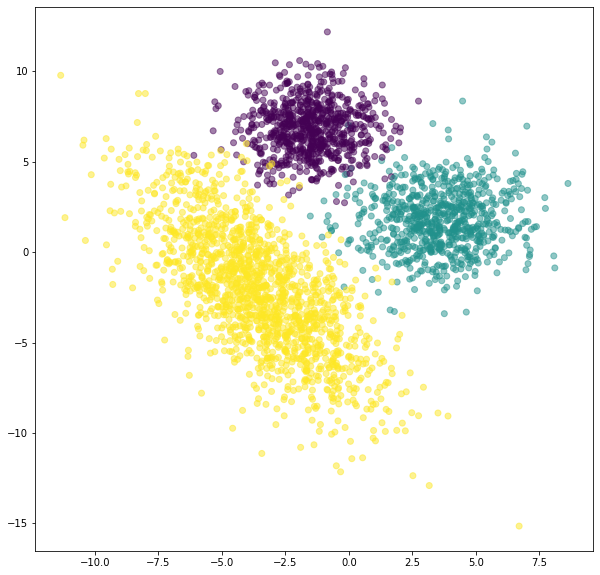

In [ ]:
# визуализируем
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [ ]:
# посмотрим распределение классов в датасете
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))
{0: 750, 1: 750, 2: 1500}

{0: 750, 1: 750, 2: 1500}

При использовании переменных X и y принято считать, что эти переменные содержат признаки объектов и классы объектов датасета соответственно.

Объект, который выполняет кластеризацию датасета с помощью EM-алгоритма, инициализируется так:

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture()

In [ ]:
# для обучения вызываем метод fit, передав входным параметром признаки объектов датасета
gm.fit(X)


GaussianMixture()

In [ ]:
# получаем предсказание
y_pred = gm.predict(X)

In [ ]:
# теперь можем получить параметры распределения классов
means = gm.means_
means

array([[-1.25114396,  1.10255233]])

## Задание 7.6.2

In [ ]:
# определяем параметры алгоритма
gm = GaussianMixture(n_components=3, random_state=42)

In [ ]:
# делаем обучение и предсказание
y_pred = gm.fit_predict(X)

In [ ]:
means = gm.means_


In [ ]:
print(np.round(means).astype(np.int64))

[[ 4  2]
 [-2  7]
 [-4 -2]]


## Задание 7.6.3

In [ ]:
_, counts = np.unique(y_pred, return_counts=True)
for count in counts:
    print(count, end=' ')

744 763 1493 

## Задание 7.6.4

In [ ]:
y_pred

array([0, 0, 1, ..., 2, 2, 2])

# 7.7. Агломеративная кластеризация. Практика

Будем поочередно объединять близлежащие объекты (кластеры), пока весь датасет не войдёт в кластеры. Посмотрим, как реализуется агломеративная кластеризация в пакете Sklearn. При инициализации можно задать количество кластеров, функцию расстояния, способ определения ближайшего соседа:

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean', # “euclidean”, “l1”, “l2”, “manhattan”, 
                                                   # “cosine”, or “precomputed”
                             linkage='ward', # “ward”, “complete”, “average”, “single”
                            )

Посмотрим, как агломеративная кластеризация будет работать с нашими наборами данных. Мы будем варьировать только число кластеров. Будем также использовать матрицу смежности, для которой нужен параметр n_neighbors, то есть число ближайших соседей.

Мы используем здесь матрицу смежности по той причине,что агломеративная кластеризация строится в качестве одного из вариантов именно по такой матрице, которая показывает, сколько ближайших соседей находится рядом с объектом.

In [ ]:
import warnings

from sklearn.neighbors import kneighbors_graph

datasets_params_list = [
    (blobs, {'n_clusters': 3, 'n_neighbors': 10}),
    (varied, {'n_clusters': 3, 'n_neighbors': 2}),
    (aniso, {'n_clusters': 3, 'n_neighbors': 2}),
    (noisy_circles, {'n_clusters': 2, 'n_neighbors': 10}),
    (noisy_moons, {'n_clusters': 2, 'n_neighbors': 10}),
    (no_structure, {'n_clusters': 3, 'n_neighbors': 10})]

for i, (X, ac_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    
    # строим матрицу смежности
    connectivity = kneighbors_graph(X, 
                                    n_neighbors=ac_params['n_neighbors'], 
                                    include_self=False)
    # делаем матрицу смежности симметричной
    connectivity = 0.5 * (connectivity + connectivity.T)
    
    ac = AgglomerativeClustering(n_clusters=ac_params['n_clusters'], 
                                 linkage='average',
                                 connectivity=connectivity)
    
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="Error",
            category=UserWarning)
        ac.fit(X)
    y_pred = ac.labels_.astype(np.int)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

NameError: name 'blobs' is not defined

В алгоритме мы сначала нормализуем признаки объектов, а затем строим матрицу смежности. Так мы получаем расстояние между объектами датасета. Далее создаём объект агломеративной кластеризации и передаём в него матрицу. Обучаем алгоритм, игнорируем предупреждения и строим предсказания.

## Задание 7.7.1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

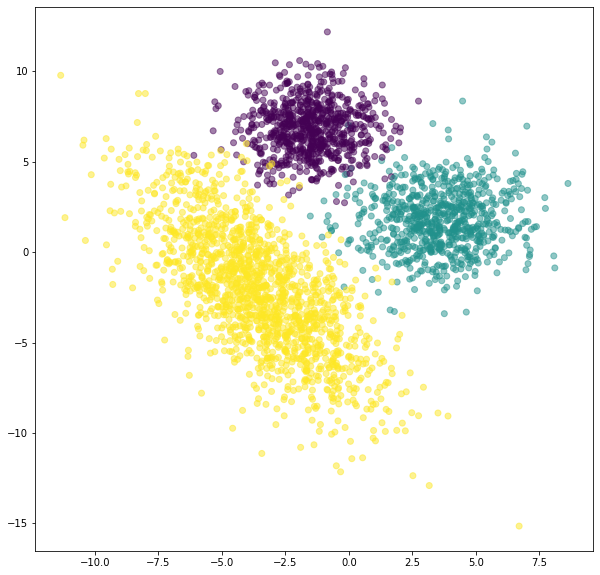

In [ ]:
# визуализация
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [ ]:
# посмотрим на распределение классов
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))
{0: 750, 1: 750, 2: 1500}

{0: 750, 1: 750, 2: 1500}

In [ ]:
# агломеративная кластеризация
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3)

In [ ]:
ac.fit(X)

AgglomerativeClustering(n_clusters=3)

In [ ]:
ac.labels_

array([2, 2, 0, ..., 1, 1, 1])

## Задание 7.7.2

In [ ]:
_, counts = np.unique(ac.labels_, return_counts=True)
for count in counts:
    print(count, end=' ')

1112 1142 746 

In [ ]:
import pyforest
import itertools

## Задание 7.7.1

In [ ]:
ii = itertools.count(X.shape[0])
[{'node_id': next(ii), 'left': x[0], 'right':x[1]} for x in ac.children_]

[{'node_id': 3000, 'left': 913, 'right': 1333},
 {'node_id': 3001, 'left': 629, 'right': 1037},
 {'node_id': 3002, 'left': 97, 'right': 250},
 {'node_id': 3003, 'left': 1708, 'right': 1965},
 {'node_id': 3004, 'left': 2479, 'right': 2605},
 {'node_id': 3005, 'left': 2586, 'right': 2997},
 {'node_id': 3006, 'left': 1989, 'right': 2120},
 {'node_id': 3007, 'left': 243, 'right': 1422},
 {'node_id': 3008, 'left': 1213, 'right': 1469},
 {'node_id': 3009, 'left': 2579, 'right': 2714},
 {'node_id': 3010, 'left': 409, 'right': 1053},
 {'node_id': 3011, 'left': 1574, 'right': 1670},
 {'node_id': 3012, 'left': 1957, 'right': 2129},
 {'node_id': 3013, 'left': 2512, 'right': 2716},
 {'node_id': 3014, 'left': 2419, 'right': 2863},
 {'node_id': 3015, 'left': 2071, 'right': 2271},
 {'node_id': 3016, 'left': 1652, 'right': 2968},
 {'node_id': 3017, 'left': 172, 'right': 278},
 {'node_id': 3018, 'left': 1591, 'right': 2247},
 {'node_id': 3019, 'left': 2112, 'right': 2604},
 {'node_id': 3020, 'left': 16

## Задание 7.7.3

In [ ]:
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

In [ ]:
ac = AgglomerativeClustering(n_clusters=3,
                                 connectivity=connectivity)

In [ ]:
ac.fit(X)

AgglomerativeClustering(connectivity=<3000x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 21754 stored elements in Compressed Sparse Row format>,
                        n_clusters=3)

In [ ]:
ac.labels_

array([1, 1, 2, ..., 0, 0, 0])

In [ ]:
_, counts = np.unique(ac.labels_, return_counts=True)
for count in counts:
    print(count, end=' ')

1486 746 768 

## Задание 7.7.4

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [75.0, 75.0, 85.0, 85.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [140.0, 140.0, 160.0, 160.0],
  [125.0, 125.0, 150.0, 150.0],
  [102.5, 102.5, 137.5, 137.5],
  [80.0, 80.0, 120.0, 120.0],
  [50.0, 50.0, 100.0, 100.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [230.0, 230.0, 252.5, 252.5],
  [210.0, 210.0, 241.25, 241.25],
  [182.5, 182.5, 225.625, 225.625],
  [275.0, 275.0, 285.0, 285.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [280.0, 280.0, 302.5, 302.5],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [355.0, 355.0, 365.0, 365.0],
  [395.0, 395.0, 405.0, 

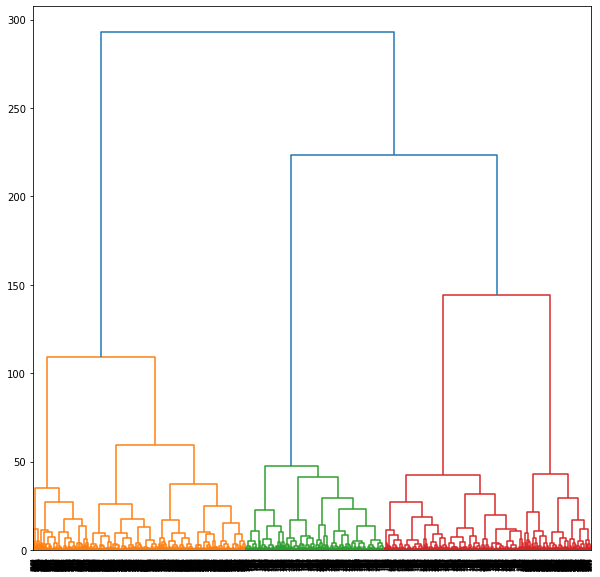

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# подготовим данные для построения дендрограммы
# ещё один способ выполнить агломеративную кластеризацию
Z = linkage(X, "ward")

# строим дендрограмму
dendrogram(Z, leaf_rotation=90.)

## Задание 7.7.6

In [ ]:
df = pd.read_csv('/work/ML-7. Кластеризация /product.txt', delimiter = " ")

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df_not_name = df.drop(['Name'], axis=1)

In [ ]:
X = StandardScaler().fit_transform(df_not_name)

In [ ]:
df

,Name,Energy,Protein,Fat,Calcium,Iron
0,Braised beef,340,20,28,9,2.6
1,Hamburger,245,21,17,9,2.7
2,Roast beef,420,15,39,7,2.0
3,Beefsteak,375,19,32,9,2.6
4,Canned beef,180,22,10,17,3.7
5,Broiled chicken,115,20,3,8,1.4
6,Canned chicken,170,25,7,12,1.5
7,Beef heart,160,26,5,14,5.9
8,Roast lamb leg,265,20,20,9,2.6
9,Roast lamb shoulder,300,18,25,9,2.3


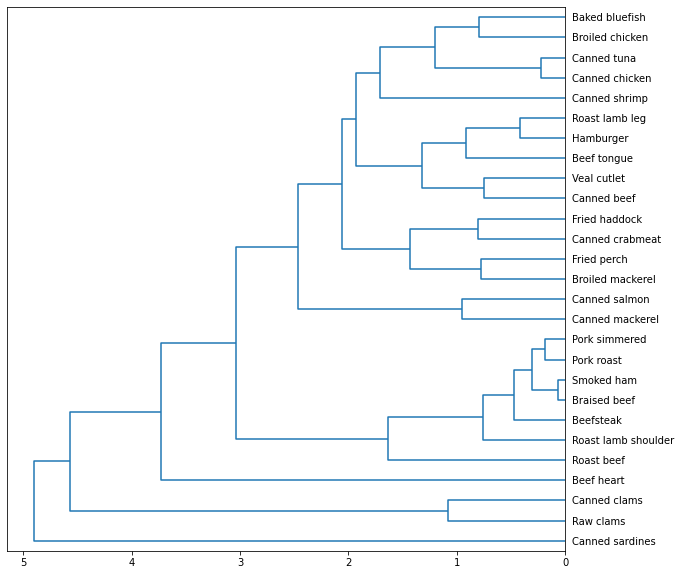

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, method='average', metric='euclidean')
names = df.Name.values
dend = dendrogram(Z, color_threshold=0, labels=names, 
                  orientation='left')

In [ ]:
from scipy.cluster.hierarchy import fcluster

t = 2.3
labels = fcluster(Z, t, criterion='distance')

In [ ]:
len(labels)

27

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=762381e0-0fb5-4cfa-9159-464420420d1d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>